## TCD_ID : 19316970

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.a

0it [00:00, ?it/s]

9920512it [00:02, 3618009.30it/s]                             


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 57573.48it/s]                           
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


1654784it [00:01, 872088.71it/s]                             
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


8192it [00:00, 22036.59it/s]            

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!



Test set: Average loss: 4.6814, Accuracy: 1171/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 4.283751
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.782599
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.455231
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.236953
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.371473
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.278913
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.129496
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.101217
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.118808
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.168474
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.162259
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.170758
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.206529
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.055739
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.062935
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.042929
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.182544
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.143348
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.226432
Train

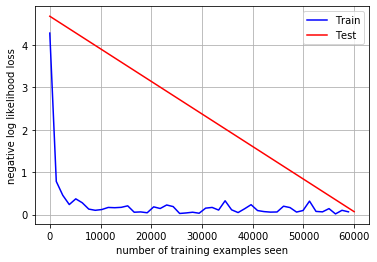

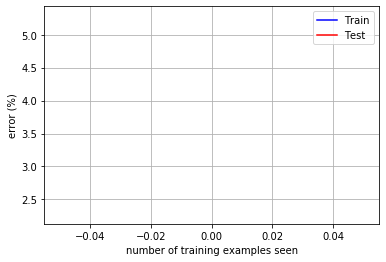

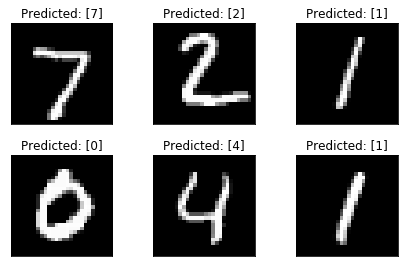

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
#1.a.i
learning_rate = 0.004 # TODO
momentum = 0.9
#1.b.ii
weight_decay = 0 # TODO
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=64, 
                               kernel_size=3, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=1200, out_features=196)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO        

    def forward(self, x):
        # TODO
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN().to(device)
    
    # optimizer creation
    #In the below mentioned line the Stochastic Gradient Descent optimizer is created
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


When 
Learning rate=0 and Weight Decay =0
Accuracy = 6%



When Learning rate= 0.005 and Weight Decay =0 Accuracy = 98%

## 1.a.i) Learning rate – explain what happens when you use too large or too small value and explain why it is happening.

When I keep the learning rate to be 0, I get a Accuracy of 6% where as 
when I increase the accuracy to 0.1 I immediately get an accuracy of 93%

0.5 gives accuracy of 11% which confirms that giving too large values again leads to a decrease in accuracy as posibbly fails to converge or diverge.

0.01 gives me an accuracy of 98%

0.03 give me an accuracy of 97%

0.005 gives me an accuracy of 98%

0.004 gives me an accuracy of 98%

0.003 gives me an accuracy of 97% 

Going through all the above observations I conclude that lower learning rate provides better results as learning rate is a hyper-parameter which controls how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. Hence, it makes sure that we do not miss any local minima.


## 1.a.ii) Weight decay – explain what happens when you use too large or too small regularization and explain why it is happening.

Learning Rate 0.004 with 
Weigth Decay :

0 gives me an accuracy of 98 %

0.1 give me an accuracy of 95% 

Increasing the weight decay to 0.5 decreases my accuracy to 73%

0.001 gives an accuracy of 98%

0.9 decreases my accuracy to 11%

Hence using 0 or smaller values along with smaller Learning rate helps me get better result, as it regularizes the model and prevents over fitting.

## 1.b


Test set: Average loss: 2.7690, Accuracy: 666/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.850848
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.691455
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.397693
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.323160
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.206911
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.419878
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.136422
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.119202
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.104665
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.164834
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.098774
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.071546
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.098311
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.184139
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.095980
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.215934
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.042783
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.079124
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.235710
Train E

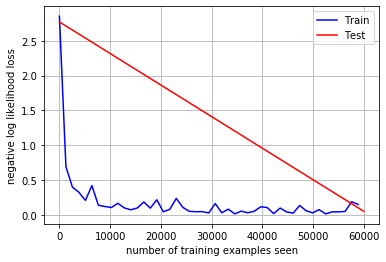

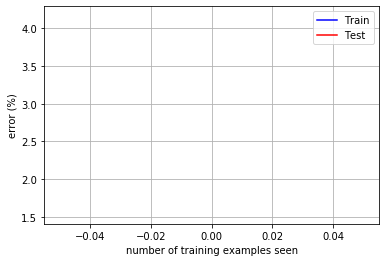

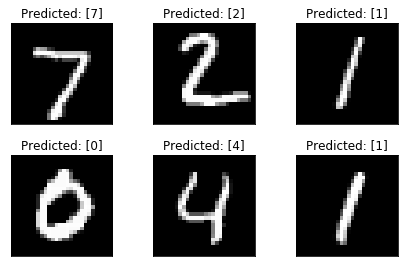

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.004 # TODO
momentum = 0.9
weight_decay = 0 # TODO
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

#1.b
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO        

    def forward(self, x):
        # TODO
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN2().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


## 1.c

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")



Test set: Average loss: 2.9856, Accuracy: 511/10000 (5%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.963161
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.793650
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.761101
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.706140
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.440172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.295527
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.443353
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.470053
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.451218
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.643367
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.533390
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.436166
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.337891
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.273583
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.449500
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.467105
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.321366
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.303218
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.418274
Train E

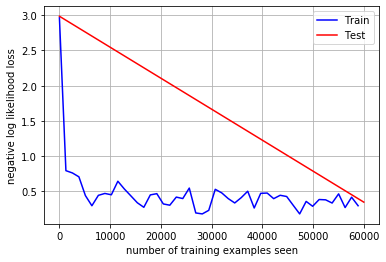

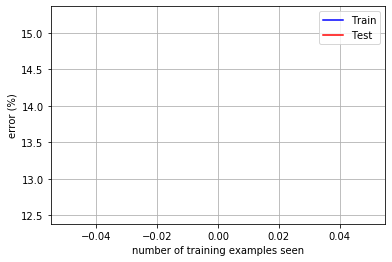

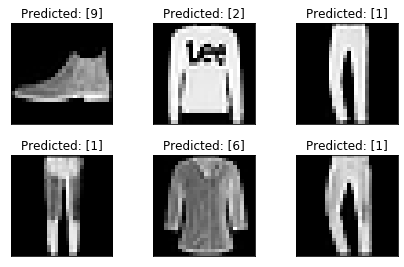

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.005 # TODO
momentum = 0.9
weight_decay = 0 #0.0005 #0.001 # TODO
log_interval = 20

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))

#1.c
#Calculating the mean and standard deviation of Fashion Dataset
train_set = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()]))
mean_train =(train_set.train_data.float().mean())/255 #0.2860
std_train = (train_set.train_data.float().std())/255 #0.3530

def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    # Using the calculated mean and standard deviation above to normalize the Fashion Mnist Dataset below
    train_data = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mean_train,), (std_train,))
                   ]))
    test_data = datasets.FashionMNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mean_train,), (std_train,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN2().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


## 1.d

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")



Test set: Average loss: 2.8342, Accuracy: 1236/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.790309
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.888153
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.778408
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.537677
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.572021
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.389791
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.414572
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.595404
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.425414
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.576314
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.342722
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.355845
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.538845
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.473604
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.371460
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.299806
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.328024
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.422998
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.471777
Train

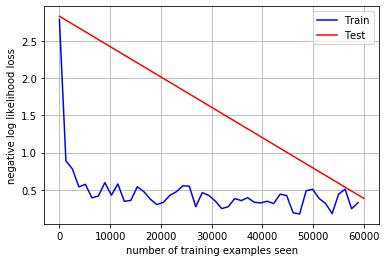

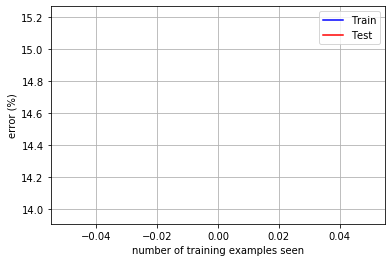

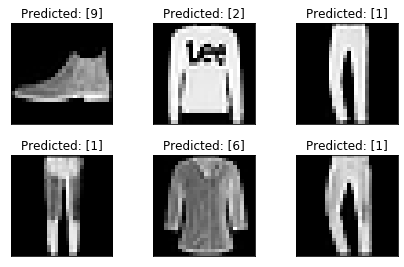

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.004 # TODO
momentum = 0.9
weight_decay = 0 # TODO
log_interval = 20

# #1.d

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.dropout=nn.Dropout(0.25)

        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')
        # TODO        

    def forward(self, x):
        # TODO
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))

#1.c
#Calculating the mean of Fashion Dataset for Test and Train
train_set = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()]))
mean_train =(train_set.train_data.float().mean())/255 #0.2860
std_train = (train_set.train_data.float().std())/255 #0.3530

def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mean_train,), (std_train,))
                   ]))
    test_data = datasets.FashionMNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mean_train,), (std_train,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN3().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


## 1.d Explain benefits of such regularization and report its accurracy on fashion MNIST and its relative improvement over CNN2.

CNN2 gives me an accuracy of 87% whereas adding dropout regularization to CNN3 increases my accuracy by 1% and gives me an accuracy of 88%.

Increaseing the EPOCH=10 gives me an accuracy of 92%

To regularize my model I use "Dropout". So, dropout at every iteration, randomly selects some nodes and removes them along with all of their incoming and outgoing connections.So each iteration has a different set of nodes and this results in a different set of outputs. Hence, it performs better as they capture more randomness.



## 1.**e**

## chandanc@tcd.ie_out.csv

## 1.f Calculate the number of parameters and the number of FLOPS of this network and submit them in YourEmail_params.csv each of the 2 values in separate row(number of parameters in the first row)

Total Parameters = 250,082

Number of FLOPS = 1,98,83,776

## CHANDANC@TCD.IE_params.csv

## 2.a Briefly explain how the authors have decided on the particular network depth. Which tasks is the DnCNN-3 designed to solve?

It has been pointed out that the receptive field size of
denoising neural networks correlates with the effective patch size of denoising methods. Moreover, high noise
level usually requires larger effective patch size to capture more context information for restoration. Thus, by fixing the noise level σ = 25 and the effective patch size of several leading denoising methods (BM3D, WNNM, EPLL, MLP, CSF and TNRD)to guide the depth design of our DnCNN were analyzed.


Thus, for Gaussian denoising with a certain noise level, the author sets the receptive field size of DnCNN
to 35 × 35 with the corresponding depth of 17. For other
general image denoising tasks, they adopt a larger receptive field and set the depth to be 20.

DnCNN-3 is designed to solve the following tasks:

1. Blind Gaussian denoising

2. SISR denoising with multiple upscaling factors,and 

3. JPEG image deblocking with different quality factors.

## 2.b

In [0]:
# -*- coding: utf-8 -*-

# =============================================================================
#  @article{zhang2017beyond,
#    title={Beyond a {Gaussian} denoiser: Residual learning of deep {CNN} for image denoising},
#    author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
#    journal={IEEE Transactions on Image Processing},
#    year={2017},
#    volume={26}, 
#    number={7}, 
#    pages={3142-3155}, 
#  }
# modified version of the code from https://github.com/cszn/DnCNN
# =============================================================================

# run this to test the model

import argparse
import os, time, datetime
import numpy as np
import torch.nn as nn
import torch.nn.init as init
import torch
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave


def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--set_dir', default='/content/drive/My Drive/DnCNN/data/Test', type=str, help='directory of test dataset')
    parser.add_argument('--set_names', default=['Set68'], help='directory of test dataset')
    parser.add_argument('--sigma', default=25, type=int, help='noise level')
    parser.add_argument('--model_path', default='/content/drive/My Drive/DnCNN/models/model_000.pth', type=str, help='the model name')
    parser.add_argument('--result_dir', default='results', type=str, help='directory of test dataset')
    parser.add_argument('--save_result', action='store_true', help='save the denoised image')
    return parser.parse_args(args=[])


def log(*args, **kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"), *args, **kwargs)


def save_result(result, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    if ext in ('.txt', '.dlm'):
        np.savetxt(path, result, fmt='%2.4f')
    else:
        imsave(path, np.uint8(np.clip(result*255.0, 0, 255)))


def show(x, title=None, cbar=False, figsize=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.imshow(x, interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()


class DnCNN(nn.Module):

    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        layers = []
        layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(n_channels))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
        self._initialize_weights()

    def forward(self, x):
        y = x
        out = self.dncnn(x)
        return y-out

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.orthogonal_(m.weight)
                print('init weight')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)


if __name__ == '__main__':

    args = parse_args()

    model = torch.load(args.model_path)
    log('load trained model')

    model.eval()  # evaluation mode

    if torch.cuda.is_available():
        model = model.cuda()

    if not os.path.exists(args.result_dir):
        os.mkdir(args.result_dir)

    for set_cur in args.set_names:

        if not os.path.exists(os.path.join(args.result_dir, set_cur)):
            os.mkdir(os.path.join(args.result_dir, set_cur))
        psnrs = []
        ssims = []

        for im in os.listdir(os.path.join(args.set_dir, set_cur)):
            if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):

                x = np.array(imread(os.path.join(args.set_dir, set_cur, im)), dtype=np.float32)/255.0
                np.random.seed(seed=0)  # for reproducibility
                y = x + np.random.normal(0, args.sigma/255.0, x.shape)  # Add Gaussian noise without clipping
                y = y.astype(np.float32)
                y_ = torch.from_numpy(y).view(1, -1, y.shape[0], y.shape[1])

                torch.cuda.synchronize()
                start_time = time.time()
                y_ = y_.cuda()
                x_ = model(y_)  # inference
                x_ = x_.view(y.shape[0], y.shape[1])
                x_ = x_.cpu()
                x_ = x_.detach().numpy().astype(np.float32)
                torch.cuda.synchronize()
                elapsed_time = time.time() - start_time
                print('%10s : %10s : %2.4f second' % (set_cur, im, elapsed_time))

                psnr_x_ = compare_psnr(x, x_)
                ssim_x_ = compare_ssim(x, x_)
                if args.save_result:
                    name, ext = os.path.splitext(im)
                    #show(np.hstack((y, x_)))  # show the image
                    save_result(x_, path=os.path.join(args.result_dir, set_cur, name+'_dncnn'+ext))  # save the denoised image
                psnrs.append(psnr_x_)
                ssims.append(ssim_x_)
        psnr_avg = np.mean(psnrs)
        ssim_avg = np.mean(ssims)
        psnrs.append(psnr_avg)
        ssims.append(ssim_avg)
        if args.save_result:
            save_result(np.hstack((psnrs, ssims)), path=os.path.join(args.result_dir, set_cur, 'results.txt'))
        log('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(set_cur, psnr_avg, ssim_avg))



/usr/local/lib/python3.6/dist-packages/torch/serialization.py:459: UserWarning: Couldn't retrieve source code for container of type DnCNN. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/u

2019-11-24 16:31:48: load trained model
     Set68 : test041.png : 0.0300 second
     Set68 : test054.png : 0.0295 second
     Set68 : test040.png : 0.0294 second
     Set68 : test047.png : 0.0295 second
     Set68 : test055.png : 0.0295 second
     Set68 : test068.png : 0.0295 second
     Set68 : test042.png : 0.0294 second
     Set68 : test056.png : 0.0296 second
     Set68 : test053.png : 0.0294 second
     Set68 : test057.png : 0.0295 second
     Set68 : test043.png : 0.0294 second
     Set68 : test046.png : 0.0295 second
     Set68 : test044.png : 0.0294 second
     Set68 : test052.png : 0.0295 second
     Set68 : test050.png : 0.0294 second
     Set68 : test009.png : 0.0297 second
     Set68 : test035.png : 0.0294 second
     Set68 : test021.png : 0.0296 second
     Set68 : test020.png : 0.0294 second
     Set68 : test051.png : 0.0294 second
     Set68 : test023.png : 0.0294 second
     Set68 : test036.png : 0.0295 second
     Set68 : test037.png : 0.0294 second
     Set68 : test

In [0]:
# -*- coding: utf-8 -*-

# =============================================================================
#  @article{zhang2017beyond,
#    title={Beyond a {Gaussian} denoiser: Residual learning of deep {CNN} for image denoising},
#    author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
#    journal={IEEE Transactions on Image Processing},
#    year={2017},
#    volume={26}, 
#    number={7}, 
#    pages={3142-3155}, 
#  }
# modified version of the code from https://github.com/cszn/DnCNN
# =============================================================================

# run this to test the model

import argparse
import os, time, datetime
import numpy as np
import torch.nn as nn
import torch.nn.init as init
import torch
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave


def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--set_dir', default='/content/drive/My Drive/DnCNN/data/Test', type=str, help='directory of test dataset')
    parser.add_argument('--set_names', default=['Set68'], help='directory of test dataset')
    parser.add_argument('--sigma', default=35, type=int, help='noise level')
    parser.add_argument('--model_path', default='/content/drive/My Drive/DnCNN/models/model_000.pth', type=str, help='the model name')
    parser.add_argument('--result_dir', default='results', type=str, help='directory of test dataset')
    parser.add_argument('--save_result', action='store_true', help='save the denoised image')
    return parser.parse_args(args=[])


def log(*args, **kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"), *args, **kwargs)


def save_result(result, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    if ext in ('.txt', '.dlm'):
        np.savetxt(path, result, fmt='%2.4f')
    else:
        imsave(path, np.uint8(np.clip(result*255.0, 0, 255)))


def show(x, title=None, cbar=False, figsize=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.imshow(x, interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()


class DnCNN(nn.Module):

    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        layers = []
        layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(n_channels))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
        self._initialize_weights()

    def forward(self, x):
        y = x
        out = self.dncnn(x)
        return y-out

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.orthogonal_(m.weight)
                print('init weight')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)


if __name__ == '__main__':

    args = parse_args()

    model = torch.load(args.model_path)
    log('load trained model')

    model.eval()  # evaluation mode

    if torch.cuda.is_available():
        model = model.cuda()

    if not os.path.exists(args.result_dir):
        os.mkdir(args.result_dir)

    for set_cur in args.set_names:

        if not os.path.exists(os.path.join(args.result_dir, set_cur)):
            os.mkdir(os.path.join(args.result_dir, set_cur))
        psnrs = []
        ssims = []

        for im in os.listdir(os.path.join(args.set_dir, set_cur)):
            if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):

                x = np.array(imread(os.path.join(args.set_dir, set_cur, im)), dtype=np.float32)/255.0
                np.random.seed(seed=0)  # for reproducibility
                y = x + np.random.normal(0, args.sigma/255.0, x.shape)  # Add Gaussian noise without clipping
                y = y.astype(np.float32)
                y_ = torch.from_numpy(y).view(1, -1, y.shape[0], y.shape[1])

                torch.cuda.synchronize()
                start_time = time.time()
                y_ = y_.cuda()
                x_ = model(y_)  # inference
                x_ = x_.view(y.shape[0], y.shape[1])
                x_ = x_.cpu()
                x_ = x_.detach().numpy().astype(np.float32)
                torch.cuda.synchronize()
                elapsed_time = time.time() - start_time
                print('%10s : %10s : %2.4f second' % (set_cur, im, elapsed_time))

                psnr_x_ = compare_psnr(x, x_)
                ssim_x_ = compare_ssim(x, x_)
                if args.save_result:
                    name, ext = os.path.splitext(im)
                    #show(np.hstack((y, x_)))  # show the image
                    save_result(x_, path=os.path.join(args.result_dir, set_cur, name+'_dncnn'+ext))  # save the denoised image
                psnrs.append(psnr_x_)
                ssims.append(ssim_x_)
        psnr_avg = np.mean(psnrs)
        ssim_avg = np.mean(ssims)
        psnrs.append(psnr_avg)
        ssims.append(ssim_avg)
        if args.save_result:
            save_result(np.hstack((psnrs, ssims)), path=os.path.join(args.result_dir, set_cur, 'results.txt'))
        log('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(set_cur, psnr_avg, ssim_avg))



/usr/local/lib/python3.6/dist-packages/torch/serialization.py:459: UserWarning: Couldn't retrieve source code for container of type DnCNN. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/u

2019-11-24 16:32:21: load trained model
     Set68 : test041.png : 0.0293 second
     Set68 : test054.png : 0.0293 second
     Set68 : test040.png : 0.0291 second
     Set68 : test047.png : 0.0292 second
     Set68 : test055.png : 0.0278 second
     Set68 : test068.png : 0.0277 second
     Set68 : test042.png : 0.0275 second
     Set68 : test056.png : 0.0276 second
     Set68 : test053.png : 0.0275 second
     Set68 : test057.png : 0.0274 second
     Set68 : test043.png : 0.0273 second
     Set68 : test046.png : 0.0274 second
     Set68 : test044.png : 0.0274 second
     Set68 : test052.png : 0.0274 second
     Set68 : test050.png : 0.0275 second
     Set68 : test009.png : 0.0275 second
     Set68 : test035.png : 0.0274 second
     Set68 : test021.png : 0.0274 second
     Set68 : test020.png : 0.0273 second
     Set68 : test051.png : 0.0278 second
     Set68 : test023.png : 0.0273 second
     Set68 : test036.png : 0.0274 second
     Set68 : test037.png : 0.0273 second
     Set68 : test

When sigma=25

PSNR = 29.26dB, SSIM = 0.9022

When sigma=35

PSNR = 22.60dB, SSIM = 0.6207

## 2.c

In [0]:
import sys
sys.path.append('/content/drive/My Drive/DnCNN')

In [0]:
# -*- coding: utf-8 -*-

# =============================================================================
#  @article{zhang2017beyond,
#    title={Beyond a {Gaussian} denoiser: Residual learning of deep {CNN} for image denoising},
#    author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
#    journal={IEEE Transactions on Image Processing},
#    year={2017},
#    volume={26}, 
#    number={7}, 
#    pages={3142-3155}, 
#  }
# modified version of the code from https://github.com/cszn/DnCNN
# =============================================================================

# run this to train the model

import argparse
import re
import os, glob, datetime, time
import numpy as np
import torch
import torch.nn as nn
from torch.nn.modules.loss import _Loss
import torch.nn.init as init
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
import data_generator as dg
from data_generator import DenoisingDataset


# Params
parser = argparse.ArgumentParser(description='PyTorch DnCNN')
parser.add_argument('--batch_size', default=128, type=int, help='batch size')
parser.add_argument('--train_data', default='/content/drive/My Drive/DnCNN/data/Train400', type=str, help='path of train data')
parser.add_argument('--sigma', default=35, type=int, help='noise level')
parser.add_argument('--epochs', default=1, type=int, help='number of train epochs')
parser.add_argument('--lr', default=0.0001, type=float, help='initial learning rate for Adam')
args = parser.parse_args(args=[])

batch_size = args.batch_size
cuda = torch.cuda.is_available()
n_epochs = args.epochs
sigma = args.sigma

save_dir = '/content/drive/My Drive/DnCNN/models_new'

if not os.path.exists(save_dir):
    os.mkdir(save_dir)


class DnCNN(nn.Module):
    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        layers = []

        layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(n_channels))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
        self._initialize_weights()

    def forward(self, x):
        y = x
        out = self.dncnn(x)
        return y-out

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.orthogonal_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)


class sum_squared_error(_Loss):
    """
    Definition: sum_squared_error = 1/2 * nn.MSELoss(reduction = 'sum')
    The backward is defined as: input-target
    """
    def __init__(self, size_average=None, reduce=None, reduction='sum'):
        super(sum_squared_error, self).__init__(size_average, reduce, reduction)

    def forward(self, input, target):
        return torch.nn.functional.mse_loss(input, target, size_average=None, reduce=None, reduction='sum').div_(2)


def findLastCheckpoint(save_dir):
    file_list = glob.glob(os.path.join(save_dir, 'model_*.pth'))
    if file_list:
        epochs_exist = []
        for file_ in file_list:
            result = re.findall(".*model_(.*).pth.*", file_)
            epochs_exist.append(int(result[0]))
        initial_epoch = max(epochs_exist)
    else:
        initial_epoch = 0
    return initial_epoch


def log(*args, **kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"), *args, **kwargs)


if __name__ == '__main__':
    # model selection
    print('===> Building model')
    model = DnCNN()
    
    initial_epoch = findLastCheckpoint(save_dir=save_dir)  # load the last model in matconvnet style
    if initial_epoch > 0 or os.path.isfile(os.path.join(save_dir, 'model_%03d.pth' % initial_epoch)):
        print('resuming by loading epoch %03d' % initial_epoch)
        model = torch.load(os.path.join(save_dir, 'model_%03d.pth' % initial_epoch))
    model.train()
    criterion = sum_squared_error()
    if cuda:
        model = model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    scheduler = MultiStepLR(optimizer, milestones=[15], gamma=0.1)  # learning rates
    for epoch in range(initial_epoch, n_epochs):

        scheduler.step(epoch)  # step to the learning rate in this epcoh
        xs = dg.datagenerator(data_dir=args.train_data)
        xs = xs.astype('float32')/255.0
        xs = torch.from_numpy(xs.transpose((0, 3, 1, 2)))  # tensor of the clean patches, NXCXHXW
        DDataset = DenoisingDataset(xs, sigma)
        DLoader = DataLoader(dataset=DDataset, num_workers=0, drop_last=True, batch_size=batch_size, shuffle=True)
        epoch_loss = 0
        start_time = time.time()

        for n_count, batch_yx in enumerate(DLoader):
            optimizer.zero_grad()
            if cuda:
                batch_x, batch_y = batch_yx[1].cuda(), batch_yx[0].cuda()
            else:
                batch_x, batch_y = batch_yx[1], batch_yx[0]
            loss = criterion(model(batch_y), batch_x)
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()
            if n_count % 100 == 0:
                print('%4d %4d / %4d loss = %2.4f' % (epoch+1, n_count, xs.size(0)//batch_size, loss.item()/batch_size))
        elapsed_time = time.time() - start_time

        log('epcoh = %4d , loss = %4.4f , time = %4.2f s' % (epoch+1, epoch_loss/n_count, elapsed_time))
        np.savetxt('/content/drive/My Drive/DnCNN/results.txt', np.hstack((epoch+1, epoch_loss/n_count, elapsed_time)), fmt='%2.4f')
        torch.save(model, os.path.join(save_dir, 'model_%03d.pth' % (epoch+1)))



===> Building model
resuming by loading epoch 001


In [0]:
# -*- coding: utf-8 -*-

# =============================================================================
#  @article{zhang2017beyond,
#    title={Beyond a {Gaussian} denoiser: Residual learning of deep {CNN} for image denoising},
#    author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
#    journal={IEEE Transactions on Image Processing},
#    year={2017},
#    volume={26}, 
#    number={7}, 
#    pages={3142-3155}, 
#  }
# modified version of the code from https://github.com/cszn/DnCNN
# =============================================================================

# run this to test the model

import argparse
import os, time, datetime
import numpy as np
import torch.nn as nn
import torch.nn.init as init
import torch
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave


def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--set_dir', default='/content/drive/My Drive/DnCNN/data/Test', type=str, help='directory of test dataset')
    parser.add_argument('--set_names', default=['Set68'], help='directory of test dataset')
    parser.add_argument('--sigma', default=35, type=int, help='noise level')
    parser.add_argument('--model_path', default='/content/drive/My Drive/DnCNN/models_new/model_001.pth', type=str, help='the model name')
    parser.add_argument('--result_dir', default='results', type=str, help='directory of test dataset')
    parser.add_argument('--save_result', action='store_true', help='save the denoised image')
    return parser.parse_args(args=[])


def log(*args, **kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"), *args, **kwargs)


def save_result(result, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    if ext in ('.txt', '.dlm'):
        np.savetxt(path, result, fmt='%2.4f')
    else:
        imsave(path, np.uint8(np.clip(result*255.0, 0, 255)))


def show(x, title=None, cbar=False, figsize=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.imshow(x, interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()


class DnCNN(nn.Module):

    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        layers = []
        layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(n_channels))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
        self._initialize_weights()

    def forward(self, x):
        y = x
        out = self.dncnn(x)
        return y-out

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.orthogonal_(m.weight)
                print('init weight')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)


if __name__ == '__main__':

    args = parse_args()

    model = torch.load(args.model_path)
    log('load trained model')

    model.eval()  # evaluation mode

    if torch.cuda.is_available():
        model = model.cuda()

    if not os.path.exists(args.result_dir):
        os.mkdir(args.result_dir)

    for set_cur in args.set_names:

        if not os.path.exists(os.path.join(args.result_dir, set_cur)):
            os.mkdir(os.path.join(args.result_dir, set_cur))
        psnrs = []
        ssims = []

        for im in os.listdir(os.path.join(args.set_dir, set_cur)):
            if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):

                x = np.array(imread(os.path.join(args.set_dir, set_cur, im)), dtype=np.float32)/255.0
                np.random.seed(seed=0)  # for reproducibility
                y = x + np.random.normal(0, args.sigma/255.0, x.shape)  # Add Gaussian noise without clipping
                y = y.astype(np.float32)
                y_ = torch.from_numpy(y).view(1, -1, y.shape[0], y.shape[1])

                torch.cuda.synchronize()
                start_time = time.time()
                y_ = y_.cuda()
                x_ = model(y_)  # inference
                x_ = x_.view(y.shape[0], y.shape[1])
                x_ = x_.cpu()
                x_ = x_.detach().numpy().astype(np.float32)
                torch.cuda.synchronize()
                elapsed_time = time.time() - start_time
                print('%10s : %10s : %2.4f second' % (set_cur, im, elapsed_time))

                psnr_x_ = compare_psnr(x, x_)
                ssim_x_ = compare_ssim(x, x_)
                if args.save_result:
                    name, ext = os.path.splitext(im)
                    #show(np.hstack((y, x_)))  # show the image
                    save_result(x_, path=os.path.join(args.result_dir, set_cur, name+'_dncnn'+ext))  # save the denoised image
                psnrs.append(psnr_x_)
                ssims.append(ssim_x_)
        psnr_avg = np.mean(psnrs)
        ssim_avg = np.mean(ssims)
        psnrs.append(psnr_avg)
        ssims.append(ssim_avg)
        if args.save_result:
            save_result(np.hstack((psnrs, ssims)), path=os.path.join(args.result_dir, set_cur, 'results.txt'))
        log('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(set_cur, psnr_avg, ssim_avg))



2019-11-24 16:32:53: load trained model
     Set68 : test041.png : 0.0294 second
     Set68 : test054.png : 0.0292 second
     Set68 : test040.png : 0.0291 second
     Set68 : test047.png : 0.0291 second
     Set68 : test055.png : 0.0293 second
     Set68 : test068.png : 0.0277 second
     Set68 : test042.png : 0.0276 second
     Set68 : test056.png : 0.0276 second
     Set68 : test053.png : 0.0274 second
     Set68 : test057.png : 0.0275 second
     Set68 : test043.png : 0.0273 second
     Set68 : test046.png : 0.0280 second
     Set68 : test044.png : 0.0274 second
     Set68 : test052.png : 0.0274 second
     Set68 : test050.png : 0.0273 second
     Set68 : test009.png : 0.0279 second
     Set68 : test035.png : 0.0274 second
     Set68 : test021.png : 0.0275 second
     Set68 : test020.png : 0.0275 second
     Set68 : test051.png : 0.0274 second
     Set68 : test023.png : 0.0273 second
     Set68 : test036.png : 0.0273 second
     Set68 : test037.png : 0.0273 second
     Set68 : test

PSNR = 27.02dB, SSIM = 0.8471

## 2.d

Download YourEmail_XXX.png containing corrupted version of data/Test/Set68/testXXX.png.
Denoise this image with the pre-trained model, submit it as YourEmail_XXX_pretrained.png

2019-11-24 16:37:42: load trained model
     Set68 : CHANDANC@TCD.IE_014.png : 0.0293 second


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:459: UserWarning: Couldn't retrieve source code for container of type DnCNN. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/u

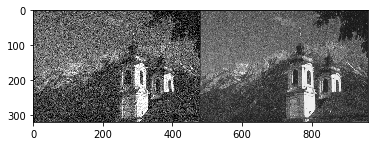

2019-11-24 16:37:42: Datset: Set68      
  PSNR = 22.71dB, SSIM = 0.8058


In [0]:
# -*- coding: utf-8 -*-

# =============================================================================
#  @article{zhang2017beyond,
#    title={Beyond a {Gaussian} denoiser: Residual learning of deep {CNN} for image denoising},
#    author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
#    journal={IEEE Transactions on Image Processing},
#    year={2017},
#    volume={26}, 
#    number={7}, 
#    pages={3142-3155}, 
#  }
# modified version of the code from https://github.com/cszn/DnCNN
# =============================================================================

# run this to test the model

import argparse
import os, time, datetime
import numpy as np
import torch.nn as nn
import torch.nn.init as init
import torch
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave


def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--set_dir', default='/content/drive/My Drive/DnCNN/014', type=str, help='directory of test dataset')
    parser.add_argument('--set_names', default=['Set68'], help='directory of test dataset')
    parser.add_argument('--sigma', default=35, type=int, help='noise level')
    parser.add_argument('--model_path', default='/content/drive/My Drive/DnCNN/models/model_000.pth', type=str, help='the model name')
    parser.add_argument('--result_dir', default='/content/drive/My Drive/DnCNN/results', type=str, help='directory of test dataset')
    parser.add_argument('--save_result', action='store_true', help='save the denoised image')
    return parser.parse_args(args=[])


def log(*args, **kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"), *args, **kwargs)


def save_result(result, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    if ext in ('.txt', '.dlm'):
        np.savetxt(path, result, fmt='%2.4f')
    else:
        imsave(path, np.uint8(np.clip(result*255.0, 0, 255)))


def show(x, title=None, cbar=False, figsize=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.imshow(x, interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()


class DnCNN(nn.Module):

    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        layers = []
        layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(n_channels))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
        self._initialize_weights()

    def forward(self, x):
        y = x
        out = self.dncnn(x)
        return y-out

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.orthogonal_(m.weight)
                print('init weight')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)


if __name__ == '__main__':

    args = parse_args()

    model = torch.load(args.model_path)
    log('load trained model')

    model.eval()  # evaluation mode

    if torch.cuda.is_available():
        model = model.cuda()

    if not os.path.exists(args.result_dir):
        os.mkdir(args.result_dir)

    for set_cur in args.set_names:

        if not os.path.exists(os.path.join(args.result_dir, set_cur)):
            os.mkdir(os.path.join(args.result_dir, set_cur))
        psnrs = []
        ssims = []

        for im in os.listdir(os.path.join(args.set_dir, set_cur)):
            if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):

                x = np.array(imread(os.path.join(args.set_dir, set_cur, im)), dtype=np.float32)/255.0
                np.random.seed(seed=0)  # for reproducibility
                y=x
                #y = x + np.random.normal(0, args.sigma/255.0, x.shape)  # Add Gaussian noise without clipping
                y = y.astype(np.float32)
                y_ = torch.from_numpy(y).view(1, -1, y.shape[0], y.shape[1])

                torch.cuda.synchronize()
                start_time = time.time()
                y_ = y_.cuda()
                x_ = model(y_)  # inference
                x_ = x_.view(y.shape[0], y.shape[1])
                x_ = x_.cpu()
                x_ = x_.detach().numpy().astype(np.float32)
                torch.cuda.synchronize()
                elapsed_time = time.time() - start_time
                print('%10s : %10s : %2.4f second' % (set_cur, im, elapsed_time))

                psnr_x_ = compare_psnr(x, x_)
                ssim_x_ = compare_ssim(x, x_)

                args.save_result='True'

                if args.save_result:
                    name, ext = os.path.splitext(im)
                    show(np.hstack((y, x_)))  # show the image
                    save_result(x_, path=os.path.join(args.result_dir, set_cur, name+'_pretrained_014'+ext))  # save the denoised image
                psnrs.append(psnr_x_)
                ssims.append(ssim_x_)
        psnr_avg = np.mean(psnrs)
        ssim_avg = np.mean(ssims)
        psnrs.append(psnr_avg)
        ssims.append(ssim_avg)
        if args.save_result:
            save_result(np.hstack((psnrs, ssims)), path=os.path.join(args.result_dir, set_cur, 'results.txt'))
        log('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(set_cur, psnr_avg, ssim_avg))



Repeat the procedure with your finetuned model, save result to
YourEmail_XXX_clean.png and report PSNR and SSIM of this image as a second row of
YourEmail_psnr.csv. 

2019-11-24 16:37:53: load trained model
     Set68 : CHANDANC@TCD.IE_014.png : 0.0293 second


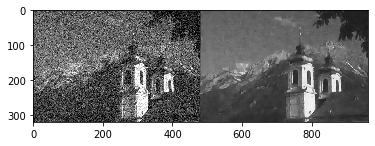

2019-11-24 16:37:54: Datset: Set68      
  PSNR = 17.97dB, SSIM = 0.3379


In [0]:
# -*- coding: utf-8 -*-

# =============================================================================
#  @article{zhang2017beyond,
#    title={Beyond a {Gaussian} denoiser: Residual learning of deep {CNN} for image denoising},
#    author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
#    journal={IEEE Transactions on Image Processing},
#    year={2017},
#    volume={26}, 
#    number={7}, 
#    pages={3142-3155}, 
#  }
# modified version of the code from https://github.com/cszn/DnCNN
# =============================================================================

# run this to test the model

import argparse
import os, time, datetime
import numpy as np
import torch.nn as nn
import torch.nn.init as init
import torch
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave


def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--set_dir', default='/content/drive/My Drive/DnCNN/014', type=str, help='directory of test dataset')
    parser.add_argument('--set_names', default=['Set68'], help='directory of test dataset')
    parser.add_argument('--sigma', default=35, type=int, help='noise level')
    parser.add_argument('--model_path', default='/content/drive/My Drive/DnCNN/models_new/model_001.pth', type=str, help='the model name')
    parser.add_argument('--result_dir', default='/content/drive/My Drive/DnCNN/results', type=str, help='directory of test dataset')
    parser.add_argument('--save_result', action='store_true', help='save the denoised image')
    return parser.parse_args(args=[])


def log(*args, **kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"), *args, **kwargs)


def save_result(result, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    if ext in ('.txt', '.dlm'):
        np.savetxt(path, result, fmt='%2.4f')
    else:
        imsave(path, np.uint8(np.clip(result*255.0, 0, 255)))


def show(x, title=None, cbar=False, figsize=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.imshow(x, interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()


class DnCNN(nn.Module):

    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        layers = []
        layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(n_channels))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
        self._initialize_weights()

    def forward(self, x):
        y = x
        out = self.dncnn(x)
        return y-out

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.orthogonal_(m.weight)
                print('init weight')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)


if __name__ == '__main__':

    args = parse_args()

    model = torch.load(args.model_path)
    log('load trained model')

    model.eval()  # evaluation mode

    if torch.cuda.is_available():
        model = model.cuda()

    if not os.path.exists(args.result_dir):
        os.mkdir(args.result_dir)

    for set_cur in args.set_names:

        if not os.path.exists(os.path.join(args.result_dir, set_cur)):
            os.mkdir(os.path.join(args.result_dir, set_cur))
        psnrs = []
        ssims = []

        for im in os.listdir(os.path.join(args.set_dir, set_cur)):
            if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):

                x = np.array(imread(os.path.join(args.set_dir, set_cur, im)), dtype=np.float32)/255.0
                np.random.seed(seed=0)  # for reproducibility
                y=x
                #y = x + np.random.normal(0, args.sigma/255.0, x.shape)  # Add Gaussian noise without clipping
                y = y.astype(np.float32)
                y_ = torch.from_numpy(y).view(1, -1, y.shape[0], y.shape[1])

                torch.cuda.synchronize()
                start_time = time.time()
                y_ = y_.cuda()
                x_ = model(y_)  # inference
                x_ = x_.view(y.shape[0], y.shape[1])
                x_ = x_.cpu()
                x_ = x_.detach().numpy().astype(np.float32)
                torch.cuda.synchronize()
                elapsed_time = time.time() - start_time
                print('%10s : %10s : %2.4f second' % (set_cur, im, elapsed_time))

                psnr_x_ = compare_psnr(x, x_)
                ssim_x_ = compare_ssim(x, x_)

                args.save_result='True'

                if args.save_result:
                    name, ext = os.path.splitext(im)
                    show(np.hstack((y, x_)))  # show the image
                    save_result(x_, path=os.path.join(args.result_dir, set_cur, name+'_clean_014'+ext))  # save the denoised image
                psnrs.append(psnr_x_)
                ssims.append(ssim_x_)
        psnr_avg = np.mean(psnrs)
        ssim_avg = np.mean(ssims)
        psnrs.append(psnr_avg)
        ssims.append(ssim_avg)
        if args.save_result:
            save_result(np.hstack((psnrs, ssims)), path=os.path.join(args.result_dir, set_cur, 'results.txt'))
        log('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(set_cur, psnr_avg, ssim_avg))




PSNR = 17.97dB, SSIM = 0.3379

CHANDANC@TCD.IE_pretrained_014.png

CHANDANC@TCD.IE_psnr.csv

CHANDANC@TCD.IE_clean_014.png



## 2.e

2019-11-24 16:38:58: load trained model
     Set68 : CHANDANC@TCD.IE_014.png : 0.0293 second


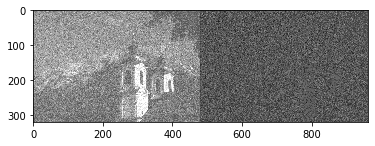

2019-11-24 16:38:59: Datset: Set68      
  PSNR = 17.97dB, SSIM = 0.3379


In [0]:
# -*- coding: utf-8 -*-

# =============================================================================
#  @article{zhang2017beyond,
#    title={Beyond a {Gaussian} denoiser: Residual learning of deep {CNN} for image denoising},
#    author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
#    journal={IEEE Transactions on Image Processing},
#    year={2017},
#    volume={26}, 
#    number={7}, 
#    pages={3142-3155}, 
#  }
# modified version of the code from https://github.com/cszn/DnCNN
# =============================================================================

# run this to test the model

import argparse
import os, time, datetime
import numpy as np
import torch.nn as nn
import torch.nn.init as init
import torch
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave
import matplotlib.pyplot as plt


def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--set_dir', default='/content/drive/My Drive/DnCNN/014', type=str, help='directory of test dataset')
    parser.add_argument('--set_names', default=['Set68'], help='directory of test dataset')
    parser.add_argument('--sigma', default=35, type=int, help='noise level')
    parser.add_argument('--model_path', default='/content/drive/My Drive/DnCNN/models_new/model_001.pth', type=str, help='the model name')
    #parser.add_argument('--model_path', default='/content/drive/My Drive/DnCNN/models/model_000.pth', type=str, help='the model name')
    parser.add_argument('--result_dir', default='/content/drive/My Drive/DnCNN/results', type=str, help='directory of test dataset')
    parser.add_argument('--save_result', action='store_true', help='save the denoised image')
    return parser.parse_args(args=[])

def log(*args, **kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"), *args, **kwargs)


def save_result(result, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    if ext in ('.txt', '.dlm'):
        np.savetxt(path, result, fmt='%2.4f')
    else:
        imsave(path, np.uint8(np.clip(result*255.0, 0, 255)))


def show(x, title=None, cbar=False, figsize=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.imshow(x, interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()


class DnCNN(nn.Module):

    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        layers = []
        layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(n_channels))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
        self._initialize_weights()

    def forward(self, x):
        y = x
        out = self.dncnn(x)
        return y-out

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.orthogonal_(m.weight)
                print('init weight')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)
if __name__ == '__main__':

    args = parse_args()

    model = torch.load(args.model_path)
    log('load trained model')

    model.eval()  # evaluation mode

    if torch.cuda.is_available():
        model = model.cuda()

    if not os.path.exists(args.result_dir):
        os.mkdir(args.result_dir)

    for set_cur in args.set_names:

        if not os.path.exists(os.path.join(args.result_dir, set_cur)):
            os.mkdir(os.path.join(args.result_dir, set_cur))
        psnrs = []
        ssims = []

        for im in os.listdir(os.path.join(args.set_dir, set_cur)):
            if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):

                x = np.array(imread(os.path.join(args.set_dir, set_cur, im)), dtype=np.float32)/255.0
                np.random.seed(seed=0)  # for reproducibility
                #y = x + np.random.normal(0, args.sigma/255.0, x.shape)  # Add Gaussian noise without clipping
                y=x
                y = y.astype(np.float32)
                y_ = torch.from_numpy(y).view(1, -1, y.shape[0], y.shape[1])

                torch.cuda.synchronize()
                start_time = time.time()
                y_ = y_.cuda()
                x_ = model(y_)  # inference
                x_ = x_.view(y.shape[0], y.shape[1])
                x_ = x_.cpu()
                x_ = x_.detach().numpy().astype(np.float32)
                torch.cuda.synchronize()
                elapsed_time = time.time() - start_time
                print('%10s : %10s : %2.4f second' % (set_cur, im, elapsed_time))

                psnr_x_ = compare_psnr(x, x_)
                ssim_x_ = compare_ssim(x, x_)

                residual_img= x - x_

                args.save_result='True'

                if args.save_result:
                    name, ext = os.path.splitext(im)
                    #show(np.hstack((y, x_)))  # show the image
                    show(np.hstack((y, residual_img)))  # show the image
                    #save_result(x_, path=os.path.join(args.result_dir, set_cur, name+'_noise'+ext))  # save the denoised image
                    plt.imsave(os.path.join(args.result_dir, set_cur, name+'_noise'+ext), np.uint8(np.clip(residual_img*255.0, 0, 255)), cmap='gray', vmin=0, vmax=127)
                psnrs.append(psnr_x_)
                ssims.append(ssim_x_)
        psnr_avg = np.mean(psnrs)
        ssim_avg = np.mean(ssims)
        psnrs.append(psnr_avg)
        ssims.append(ssim_avg)
        if args.save_result:
            save_result(np.hstack((psnrs, ssims)), path=os.path.join(args.result_dir, set_cur, '/content/drive/My Drive/DnCNN/results.txt'))
        log('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(set_cur, psnr_avg, ssim_avg))


In [0]:
import cv2
sd = np.std(residual_img)
print (sd)

0.12631102


CHANDANC@TCD.IE_014_noise

Standard Deviation of Residual Image : 0.12631102

## 3.a
# i) How FCN upsamples predictions to match the original image size.

FCN upsamples predictions to match the original image size using backwards convolution(sometimes called deconvolution) with an output stride of
f(as mentioned in the paper).

# ii) How had the authors improved the coarse predictions produced by the deepest layer. 

The author has improved the coarse predictions produced by the deepest layer by defining skip architecture that combines semantic information from a deep, coarse layer with appearance information from a shallow, fine layer to produce accurate and detailed segmentations. Skips are added between layers to fuse coarse,semantic and local appearance information. This skip architecture is
learned end-to-end to refine the semantics and spatial precision of the output.

## 3.b

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:00<00:00, 207MB/s]
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:02<00:00, 106MB/s]


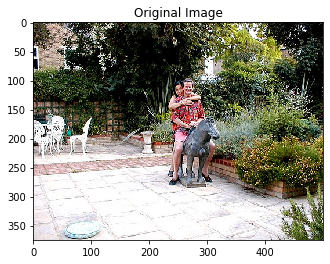

torch.Size([1, 21, 375, 500])
[ 0  9 13 15 16]


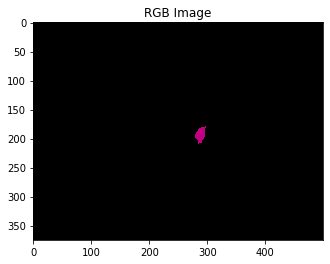

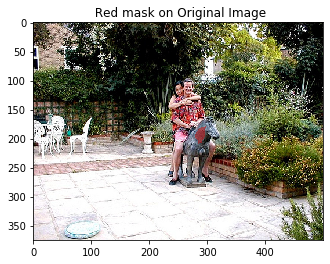

In [0]:
# -*- coding: utf-8 -*-
"""
Based on code from
    https://colab.research.google.com/github/spmallick/learnopencv/blob/master/PyTorch-Segmentation-torchvision/intro-seg.ipynb
"""

from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import numpy as np
import torchvision.transforms as T
import cv2


def decode_segmap(image, nc):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  # for l in range(0, nc):
  #     idx = image == l
  #     r[idx] = label_colors[l, 0]
  #     g[idx] = label_colors[l, 1]
  #     b[idx] = label_colors[l, 2]
    
  idx = image == nc
  r[idx] = label_colors[nc, 0]
  g[idx] = label_colors[nc, 1]
  b[idx] = label_colors[nc, 2]

  rgb = np.stack([r, g, b], axis=2)
  return rgb


def apply_mask(im, im_pred):
    """
    Overlays the predicted class labels onto an image using the alpha channel.
    This function assumes that the background label is the black color.
    This function is provided as an inspiration for the masking function you should write.
    """
    #im_pred=np.array(Image.fromarray(im_pred).resize((640,853), Image.BILINEAR))
    r_channel, g_channel, b_channel = cv2.split(im_pred)
    alpha_channel = 127 * np.ones(b_channel.shape, dtype=b_channel.dtype)
    # Make background pixels fully transparent
    alpha_channel -= 127 * np.all(im_pred == np.array([0, 0, 0]), axis=2).astype(b_channel.dtype)

    #Assigning 0 to g and b channels as we need only r channel
    g_channel=np.zeros(g_channel.shape, dtype=g_channel.dtype)
    b_channel=np.zeros(b_channel.shape, dtype=b_channel.dtype)

    im_pred = cv2.merge((r_channel, g_channel, b_channel, alpha_channel))
    mask = Image.fromarray(im_pred, mode='RGBA')
    masked_img = Image.fromarray(im)
    masked_img.paste(mask, box=None, mask=mask)
    return np.array(masked_img)

# define the model
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

# load an image
img = Image.open('/content/drive/My Drive/Computer Vision/Group_Project/CHANDANC@TCD.IE.png')
plt.title('Original Image');plt.imshow(img); plt.show()

# transform the image
trf = T.Compose([#T.Resize(640),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

# pass the input through the net
out = fcn(inp)['out']
print (out.shape)

# calculate labels
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (np.unique(om))

# show segmentation output
rgb = decode_segmap(om,13)
plt.title('RGB Image');plt.imshow(rgb); plt.show()

# 3.b
#Display the image with red mask 
#img1 = Image.open('/content/drive/My Drive/Computer Vision/Group_Project/CHANDANC@TCD.IE.png')#.resize(rgb.shape[1::-1], Image.BILINEAR)                
plt.title(' Red mask on Original Image');plt.imshow(apply_mask(np.array(img),rgb)); plt.show()
plt.imsave('/content/drive/My Drive/Computer Vision/Group_Project/CHANDANC@TCD.IE_predicted.png',apply_mask(np.array(img),rgb))


## 3.c

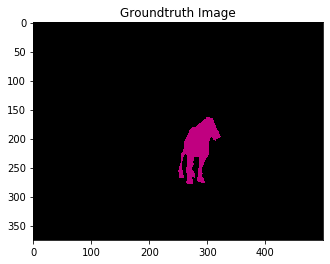

In [0]:
#Decoding the groundtruth image 
mask_img=Image.open('/content/drive/My Drive/Computer Vision/Group_Project/CHANDANC@TCD.IE_mask.png')
pixel=mask_img.load()
for i in range(np.array(mask_img).shape[1]):
  for j in range(np.array(mask_img).shape[0]):
    if not (pixel[i,j]==(192, 0, 128)):

      pixel[i,j]=(0,0,0)

plt.title("Groundtruth Image");plt.imshow(mask_img); plt.show()

In [0]:
#Calculating the Intersection over Union
intersec=np.sum(np.logical_and(rgb,np.array(mask_img)))
union=np.sum(np.logical_or(rgb,np.array(mask_img)))
IOU=intersec/union
print(IOU)

0.08575031525851198


## REFERENCES:

1. https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

2. https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

3. https://arxiv.org/pdf/1608.03981.pdf

4. https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf